


* [Logistic Regression](#logisticregression)
  * Odds, Statsmodel Logistic Regression, Interpretation, Scikit Learn Logistic Regression
  

* [Date and Time with Pandas](#datetimewithpandas)
  * date_range,  Timestamp, timedelta, convert to and from utc timestamp, difference between two dates, Timezones/DST
  * read_xxx with dates
  
  
* [Time Series](#timeseries1)
    * Resampling, Lag, Rolling window (Moving average), Expanding Window
    
    
* [Trend and Seasonal Pattern in Time Series](#timeseries2)
    * Air Passengers Dataset
      (Trend Spotting, Stationary Time Series, How to make the time series stationary ?, Auto Correlation , PACF)
        
    * Sunspots Dataset  - ARIMA, Ljung Box test
            


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn

from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

<a id='logisticregression'></a>

# Logistic Regression 
[Back to top](#top)


- Models the probability of an event occuring depending on the values of independent variables, which can be categorical or numerical.

- Estimates the probability that an event occurs for a randomly selected observation versus the probability that the event does not occur.

- Predicts the effect of a series of variables on a binary response variable.

- Classify observations by estimating the probability that an observation is in particular category.  

#### Why can't we use Linear Regression ?

- Simple Linear Regression is one quantitative variable predicting another. 

- Multiple Linear regression is simple linear regression with more independent variables. 

- NonLinear regression is still two quantitative variables, but the data is curvilinear.

- Binary data does not have normal distribution, which is a condition needed for linear regression.

- Predicted values of the dependent variable can be beyond 0 and 1 which violates the definition of probability.

- Probabilities are often not linear such as 'U' shapes where probability is very low or very high at the extremes of x-values.

#### What are odds ? 

$ odds = \frac{P(event \ occuring)}{P(not \ occuring)} $

$ odds = \frac{p}{1 - p}$

$ log(odds) = log(\frac{p}{1 - p})$

**Fair Die Roll**

$odds (1\ or\ 2) = \frac{0.333}{0.666} = 1:2 $

- Odds ratio - ratio of two odds

**Fair Coin Flip**

$P(heads)=0.5$

$odds(heads)=\frac{0.5}{1-0.5} = 1:1$

**Loaded coin flip**

$P(heads) = 0.7$

$odds(heads) = \frac{0.7}{1-0.7} =  2.333$

Odds ratio (ratio of two odds) of Loaded vs. fair coin flip = 2.333:1  

This means odds of getting heads on the loaded coin are 2.333 times greater than the fair coin.


- The odds ratio for a variable in logistic regression represents how the odds change with a 1 unit increase in that variable holding all other variables constant.  

- Odds can have large magnitude even though underlying probability is very small.


###  Application 
- With Statsmodel and Scikit Learn

Dataset information - http://www.statsmodels.org/dev/datasets/generated/ccard.html

In [2]:
df = sm.datasets.ccard.load_pandas().data
df['intercept'] = 1
df = df[['intercept', 'AGE', 'INCOME','OWNRENT']]  #Income in 10,000s
print(df.shape)
df.head()

(72, 4)


,intercept,AGE,INCOME,OWNRENT
0,1,38.0,4.52,1.0
1,1,33.0,2.42,0.0
2,1,34.0,4.50,1.0
3,1,31.0,2.54,0.0
4,1,32.0,9.79,1.0


In [3]:
model = sm.Logit(df.OWNRENT, df[['intercept', 'AGE', 'INCOME']])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.492144
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                OWNRENT   No. Observations:                   72
Model:                          Logit   Df Residuals:                       69
Method:                           MLE   Df Model:                            2
Date:                Sat, 09 Sep 2017   Pseudo R-squ.:                  0.2561
Time:                        23:13:46   Log-Likelihood:                -35.434
converged:                       True   LL-Null:                       -47.633
                                        LLR p-value:                 5.039e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.0978      1.570     -3.885      0.000      -9.174      -3.021
AGE            0.1056      0.046      2.300      0.021       0.016       0.196
INCOME         0.6411      0.246      2.605      0.009       0.159       1.123
==============================================================================
"""

**What do the coefficients mean? **

- Coefficients are log odds. 
- A one-unit increase in Income is associated with an increase in the log odds of OWNRENT by 0.6411 (other dependent variables being constant).
- A one-unit increase in Age is associated with an increase in the log odds of OWNRENT by 0.1056 (other dependent variables being constant).

** How do you predict ? **

$ \hat{p}(X) = \frac{e^{\hat{\beta_0}+\hat{\beta_1}X}}{1 + e^{\hat{\beta_0}+\hat{\beta_1}X}} $


In this case,

$ \hat{p}(X) = \frac{e^{\hat{\beta_0}+\hat{\beta_1}X_1 +\hat{\beta_2}X_2} }{1 + e^{\hat{\beta_0}+\hat{\beta_1}X_1 +\hat{\beta_2}X_2}} $

Substituting above coefficients we get, 

$\hat{p}(X) = \frac{e^{-6.0978+0.1056X_1 +0.6411X_2} }{1 + e^{-6.0978+0.1056X_1 +0.6411X_2}}$  
Here, X1 = Age and X2 = Income

Using numpy to make things simpler - Consider X1(Age)=38 and X2(Income)=5 

In [4]:
print('A subject with Age=38 and Income=5 has the probability to OWNRENT -')
print(np.exp(-6.0978+0.1056*38 + 0.6411*5)/(1+np.exp(-6.0978+0.1056*38 + 0.6411*5)))

print('\nCalulating odds:')
print(0.75408144953639544/(1-0.75408144953639544))

A subject with Age=38 and Income=5 has the probability to OWNRENT -
0.754081449536

Calulating odds:
3.066387013565282


Increase income by 1 (keep age constant)

In [5]:
print('A subject with Age=38 and Income=6 has the probability to OWNRENT -')
print(np.exp(-6.0978+0.1056*38 + 0.6411*6)/(1+np.exp(-6.0978+0.1056*38 + 0.6411*6)))

print('\nCalulating odds:')
print(0.853409935671/(1-0.853409935671))

A subject with Age=38 and Income=6 has the probability to OWNRENT -
0.853409935671

Calulating odds:
5.821744738140273


** A one-unit increase in Income is associated with an increase in the log odds of OWNRENT by 0.6411 (age being constant).**

In [6]:
np.log(5.8217447381230425/3.066387013565282) #This is the same as coefficient for Income

0.64110000000000034

**The estimated coefficients are the log odds. By exponentiating these values, we can calculate the odds, which may be
easier to interpret.**

In [7]:
np.exp(result.params)

intercept    0.002248
AGE          1.111398
INCOME       1.898642
dtype: float64

**Predict using statsmodels **

In [8]:
result.predict(np.array([[1,38,5],[1,38,6]]))

array([ 0.75424002,  0.85352174])

##  Logistic Regression with Scikit Learn

In [9]:
#Creating a model
model = LogisticRegression(random_state=57,C=1e10).fit(df[['AGE', 'INCOME']],df.OWNRENT)
#Retrieving model coefficients
print("Coefficients:",model.coef_)
#Model Intercept
print("Intercept:",model.intercept_)

Coefficients: [[ 0.10561123  0.64111961]]
Intercept: [-6.09753153]


In [10]:
#Predicting probabilities
y_pred = model.predict_proba(np.array([[38,5],[38,6],[20,5]]))
print(y_pred)

#To get actual class values
print(np.where(y_pred[:,1]>0.5 , 1, 0))

[[ 0.24577146  0.75422854]
 [ 0.14648839  0.85351161]
 [ 0.68561735  0.31438265]]
[1 1 0]


In [11]:
#Predicting actual class values 0 or 1
model.predict(np.array([[38,5],[38,6],[20,5]]))

array([ 1.,  1.,  0.])

<a id='datetimewithpandas'></a>

# Date and Time with Pandas
[Back to top](#top)



** Generating Time Series **


In [12]:
# specify with start date & number of periods
rng = pd.date_range('2016 Jul 15 10:15', periods = 10, freq = 'M')  #B - Business days #5T - 5 minute
rng

DatetimeIndex(['2016-07-31 10:15:00', '2016-08-31 10:15:00',
               '2016-09-30 10:15:00', '2016-10-31 10:15:00',
               '2016-11-30 10:15:00', '2016-12-31 10:15:00',
               '2017-01-31 10:15:00', '2017-02-28 10:15:00',
               '2017-03-31 10:15:00', '2017-04-30 10:15:00'],
              dtype='datetime64[ns]', freq='M')

** Timestamps **

In [13]:
pd.Timestamp('2016-07-10')

Timestamp('2016-07-10 00:00:00')

In [14]:
t = pd.Timestamp('2016-7-10 10:15:15')
t.quarter  #which quarter of the year

3

In [15]:
pd.Timestamp('2016-07-10 8 pm')

Timestamp('2016-07-10 20:00:00')

** Time offsets **

In [16]:
pd.Timedelta('1 day 1us 15ns')

Timedelta('1 days 00:00:00.000001')

In [17]:
pd.Timedelta('1 day 1us 15ns').nanoseconds

15

In [18]:
pd.Timestamp('2016-07-01 8:00') + pd.Timedelta('1.5 hours')

Timestamp('2016-07-01 09:30:00')

In [19]:
pd.Timedelta('15ns') #bug? what kind of bug? or formatting issue

Timedelta('0 days 00:00:00.000000')

In [20]:
rng

DatetimeIndex(['2016-07-31 10:15:00', '2016-08-31 10:15:00',
               '2016-09-30 10:15:00', '2016-10-31 10:15:00',
               '2016-11-30 10:15:00', '2016-12-31 10:15:00',
               '2017-01-31 10:15:00', '2017-02-28 10:15:00',
               '2017-03-31 10:15:00', '2017-04-30 10:15:00'],
              dtype='datetime64[ns]', freq='M')

In [21]:
rng + pd.Timedelta('1day')

DatetimeIndex(['2016-08-01 10:15:00', '2016-09-01 10:15:00',
               '2016-10-01 10:15:00', '2016-11-01 10:15:00',
               '2016-12-01 10:15:00', '2017-01-01 10:15:00',
               '2017-02-01 10:15:00', '2017-03-01 10:15:00',
               '2017-04-01 10:15:00', '2017-05-01 10:15:00'],
              dtype='datetime64[ns]', freq='MS')

** Difference between two dates in seconds **

In [22]:
(pd.Timestamp('2016-08-01 10:15:00') - pd.Timestamp('2016-08-01 10:00:00')).seconds 

900

In [23]:
#Convert timedelta to number of seconds
td = pd.to_timedelta ("22 days 04:37:08")
print(td," is ",(td / np.timedelta64(1, 's')).astype(int)," seconds")

#Convert seconds to hh:mm:ss
sec = 63914
print(sec, " seconds is " ,pd.to_timedelta(sec, unit='s'))

#difference between two dates in seconds
a = pd.Timestamp('2015-09-22 01:20:44.551')
b = pd.Timestamp('2015-09-22 02:55:15.649')
print((b-a).seconds)

#difference
a = pd.Timestamp('02:30:10.917 18-09-2015')
b = pd.Timestamp('02:35:57.573 18-09-2015')
print((b-a).seconds)

22 days 04:37:08  is  1917428  seconds
63914  seconds is  0 days 17:45:14
5671
346


** Convert UTC time to date time**

In [24]:
pd.to_datetime(1493857123,unit='s'), pd.to_datetime('2017-05-04 00:18:43').timestamp()

(Timestamp('2017-05-04 00:18:43'), 1493871523.0)

** Convert a datetime to float UTC time**

In [25]:
pd.to_datetime('2017-May-31 15:30:00').timestamp(),pd.to_datetime('2017-May-31 16:00:00').timestamp()

(1496259000.0, 1496260800.0)

In [26]:
fmt = '%Y-%b-%d %H:%M:%S' 
print(pd.to_datetime('2017-May-31 12:00:00').timestamp())
print(pd.to_datetime('2017-May-31 12:00:00',utc=False).timestamp())

pd.to_datetime('1496246400',unit='s').strftime(fmt) 

1496246400.0
1496246400.0


'2017-May-31 16:00:00'

** Pandas series with time index **

In [27]:
num_periods = 40
ts_pd = pd.Series(range(num_periods), pd.date_range('2016-07-01', freq = 'M', periods = num_periods))

In [28]:
ts_pd['2016-07':'2017-07']

2016-07-31     0
2016-08-31     1
2016-09-30     2
2016-10-31     3
2016-11-30     4
2016-12-31     5
2017-01-31     6
2017-02-28     7
2017-03-31     8
2017-04-30     9
2017-05-31    10
2017-06-30    11
2017-07-31    12
Freq: M, dtype: int64

In [29]:
ts_pd['2016']

2016-07-31    0
2016-08-31    1
2016-09-30    2
2016-10-31    3
2016-11-30    4
2016-12-31    5
Freq: M, dtype: int64

** Timezones and Daylight savings **

In [30]:
rng = pd.date_range('2017-03-10', periods = 12, tz = 'US/Eastern') #Default daily frequency #2016-03-03  2016-11-3
ts = pd.Series(range(12), index = rng)
ts

2017-03-10 00:00:00-05:00     0
2017-03-11 00:00:00-05:00     1
2017-03-12 00:00:00-05:00     2
2017-03-13 00:00:00-04:00     3
2017-03-14 00:00:00-04:00     4
2017-03-15 00:00:00-04:00     5
2017-03-16 00:00:00-04:00     6
2017-03-17 00:00:00-04:00     7
2017-03-18 00:00:00-04:00     8
2017-03-19 00:00:00-04:00     9
2017-03-20 00:00:00-04:00    10
2017-03-21 00:00:00-04:00    11
Freq: D, dtype: int64

** Pandas - Parsing dates with read_csv **

In [31]:
df = pd.read_csv('ao_monthly.txt',header=None)
df.head()

,0
0,1950 1 -0.60310E-01
1,1950 2 0.62681E+00
2,1950 3 -0.81275E-02
3,1950 4 0.55510E+00
4,1950 5 0.71577E-01


In [32]:
df = pd.read_fwf('ao_monthly.txt',header=None) #Fixed width format
df.head()

,0,1,2
0,1950,1,-0.060310
1,1950,2,0.626810
2,1950,3,-0.008128
3,1950,4,0.555100
4,1950,5,0.071577


In [33]:
df = pd.read_fwf('ao_monthly.txt', header = None, 
                   parse_dates = [[0, 1]], infer_datetime_format = True,index_col = 0) 
df.head()

,2
0_1,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [34]:
min(df.index), max(df.index)

(Timestamp('1950-01-01 00:00:00'), Timestamp('2016-06-01 00:00:00'))

** Extract datetimes from existing Data Frame columns **

In [35]:
df = pd.DataFrame({'year':[2015, 2016], 'month':[2,3], 'day':[4,5], 'hour':[12, 13]})
df

,day,hour,month,year
0,4,12,2,2015
1,5,13,3,2016


In [36]:
pd.to_datetime(df)

0   2015-02-04 12:00:00
1   2016-03-05 13:00:00
dtype: datetime64[ns]

In [37]:
# BUT
df['value'] = 17
#pd.to_datetime(df)  #so labels day, hour, month, year are crucial

<a id='timeseries1'></a>

# Time Series
[Back to top](#top)


## Resampling

In [38]:
rng = pd.date_range('1/1/2011', periods = 72, freq = 'H') #Generating hourly data
ts = pd.Series(list(range(5,len(rng)+5)), index = rng)  
ts.head()

2011-01-01 00:00:00    5
2011-01-01 01:00:00    6
2011-01-01 02:00:00    7
2011-01-01 03:00:00    8
2011-01-01 04:00:00    9
Freq: H, dtype: int64

In [39]:
converted = ts.asfreq('45Min', method = 'ffill')  #You want data at 45min interval
# try 'ffill', 'bfill', None

In [40]:
ts.head(), ts.shape

(2011-01-01 00:00:00    5
 2011-01-01 01:00:00    6
 2011-01-01 02:00:00    7
 2011-01-01 03:00:00    8
 2011-01-01 04:00:00    9
 Freq: H, dtype: int64, (72,))

In [41]:
converted.head(), converted.shape

(2011-01-01 00:00:00    5
 2011-01-01 00:45:00    5
 2011-01-01 01:30:00    6
 2011-01-01 02:15:00    7
 2011-01-01 03:00:00    8
 Freq: 45T, dtype: int64, (95,))

** Can you go to less frequent rather than more frequent? **

In [42]:
converted = ts.asfreq('2H') #You want data at 2hour interval instead of hourly
converted[0:5]

2011-01-01 00:00:00     5
2011-01-01 02:00:00     7
2011-01-01 04:00:00     9
2011-01-01 06:00:00    11
2011-01-01 08:00:00    13
Freq: 2H, dtype: int64

In [43]:
# Let's try the more flexible .resample()
ts.resample('2H',label='left').mean()[:5]   #kind of group by

2011-01-01 00:00:00     5.5
2011-01-01 02:00:00     7.5
2011-01-01 04:00:00     9.5
2011-01-01 06:00:00    11.5
2011-01-01 08:00:00    13.5
Freq: 2H, dtype: float64

In [44]:
# What's particularly useful is that we can use reample to even out irregular time series
irreg_ts = ts[list(np.random.choice(list(range(len(ts))), size = 10, replace = False))]

In [45]:
irreg_ts = irreg_ts.sort_index()
irreg_ts

2011-01-01 01:00:00     6
2011-01-01 04:00:00     9
2011-01-01 05:00:00    10
2011-01-01 08:00:00    13
2011-01-02 19:00:00    48
2011-01-02 20:00:00    49
2011-01-03 06:00:00    59
2011-01-03 09:00:00    62
2011-01-03 11:00:00    64
2011-01-03 16:00:00    69
dtype: int64

In [46]:
irreg_ts.asfreq('D', method = 'bfill') 
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.asfreq.html

2011-01-01 01:00:00     6
2011-01-02 01:00:00    48
2011-01-03 01:00:00    59
Freq: D, dtype: int64

In [47]:
irreg_ts.resample('D').mean()

2011-01-01     9.5
2011-01-02    48.5
2011-01-03    63.5
Freq: D, dtype: float64

## Moving window functions

- Lag, Rolling window, Expanding window, EWMA

** Lag features **

<img src="lag1.png" , height="220", width="420" ></img>
Source: https://onlinecourses.science.psu.edu/stat510/node/47

In [48]:
ts = pd.Series(np.random.randn(20) + 10, pd.date_range('7/1/16', freq = 'D', periods = 20))
ts.head()

2016-07-01     9.759703
2016-07-02    10.568167
2016-07-03    10.806733
2016-07-04    11.233672
2016-07-05     8.958898
Freq: D, dtype: float64

In [49]:
ts_lagged = ts.shift()
ts_lagged.head()

2016-07-01          NaN
2016-07-02     9.759703
2016-07-03    10.568167
2016-07-04    10.806733
2016-07-05    11.233672
Freq: D, dtype: float64

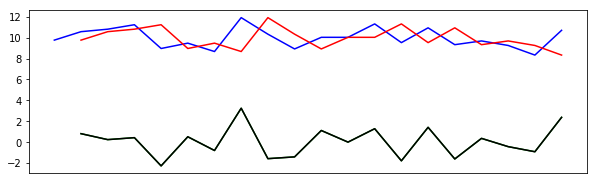

In [50]:
fig, ax = plt.subplots(figsize=(10,3))
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red');
plt.plot(ts - ts_lagged, color = 'green')  
plt.plot(ts.diff(), color = 'black') #equivalent to above
plt.xticks([], []); #suppressing xticks


### Rolling Window Functions

In [51]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-05-01,1.042351,-0.169976,-0.574061
2016-05-02,-0.017869,-0.636822,1.475558
2016-05-03,0.319493,-0.532586,0.575177
2016-05-04,-2.003887,-0.442914,-0.300207
2016-05-05,0.182317,0.618531,0.226772


In [52]:
r = df.rolling(window = 5) #smaller window mimics your time series can help reduce noise, 
#larger window sizes help when you don't care about peaks and dips in the time series
r

Rolling [window=5,center=False,axis=0]

In [53]:
print(df.iloc[0:5]['A'].mean()) #to verify
r.mean().head(n=7) 

-0.0955189512522


,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,-0.095519,-0.232753,0.280648
2016-05-06,-0.344038,-0.125585,0.503196
2016-05-07,-0.199954,-0.222229,0.140221


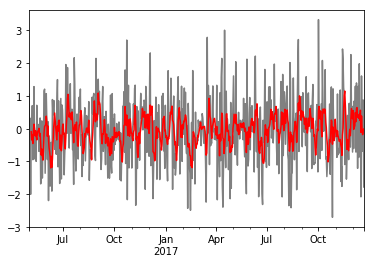

In [54]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red');

In [55]:
np.mean(df.iloc[0:2]['A']), np.mean(df.iloc[0:3]['A'])

(0.51224108755272302, 0.44799165567285298)

In [56]:
df.expanding(min_periods = 1).mean()[0:5]

,A,B,C
2016-05-01,1.042351,-0.169976,-0.574061
2016-05-02,0.512241,-0.403399,0.450749
2016-05-03,0.447992,-0.446461,0.492225
2016-05-04,-0.164978,-0.445574,0.294117
2016-05-05,-0.095519,-0.232753,0.280648


** Pandas EWMA **  
- More recent points are interesting.

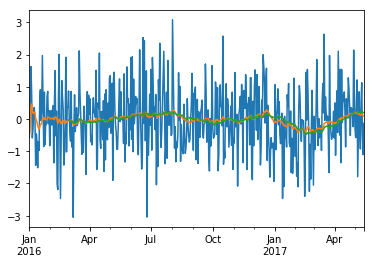

In [57]:
ts = pd.Series(np.random.randn(500), index = pd.date_range(start = '1/1/16', periods = 500, freq = 'D'))
ts.plot()
ts.ewm(span = 60, freq = 'D', min_periods = 0, adjust = True).mean().plot()
ts.rolling(window = 60).mean().plot();

<a id='timeseries2'></a>

# Trend and Seasonal Pattern in time series
[Back to top](#top)

- Air Passengers Dataset
        - Trend Spotting, Stationary Time Series, How to make the time series stationary ?, Auto Correlation, PACF
- Lake Erie Dataset


#### The classic Air Passengers Dataset 

In [58]:
df = pd.read_csv('AirPassengers.csv', parse_dates=['date'] ) 
df.columns=['#Passengers','Month']
df.set_index('Month',inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [59]:
df['1949']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


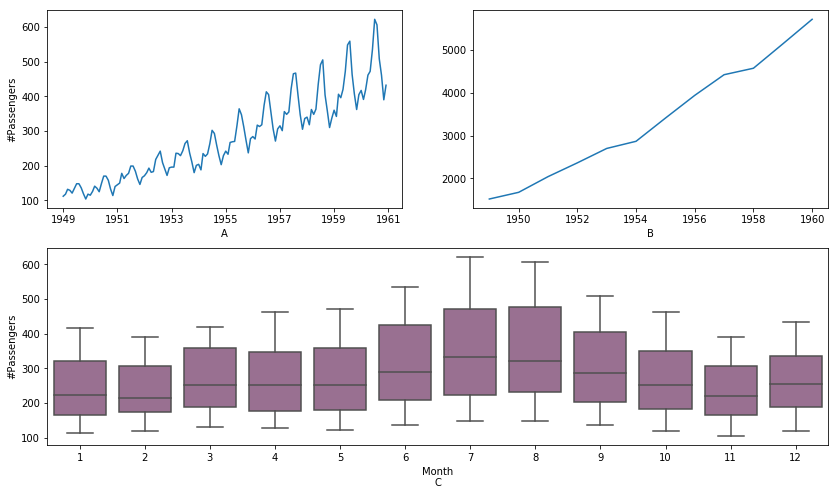

In [60]:
#Trend spotting
f, axs = plt.subplots(2,2,figsize=(14,8))

plt.subplot(221)
plt.plot(df)
plt.xlabel('A')
plt.ylabel("#Passengers")

plt.subplot(222)
plt.xlabel('B')
plt.plot(df.groupby([(df.index.year)]).sum())


plt.subplot(212)
seaborn.boxplot(df.index.month, df['#Passengers'], color="#A06995")
plt.xlabel("Month\nC");

(A) 
It is apparent that the number of passengers travelling on the airline is increasing with time, so there appears to be an increasing trend. There is also a clear cycle in the data which has a one-year period, i.e. there is clear seasonal variation in the data.

A time series plot is not only important for revealing patterns and features of the data but can also reveal potential outliers or erroneous values. For example, missing data are sometimes coded using a negative value – such values would obviously need to be handled differently in the analysis, and would certainly not want to be included as observations when fitting a model to data, such as the airline series, which can only take positive values.

(B) The yearly trend also shows that the #passengers have been increasing without fail.

(C) Seasonal boxplots of the data: An increasing trend is evident in the annual series , whilst the seasonal effects are clearly revealed in the boxplot, for which a tendency for more people to travel over the summer months of June to September can be seen.
The variance and the mean value in July and August is much higher than rest of the months.





### Stationary Time Series 

A stationary time series is one whose statistical properties such as *mean, variance, autocorrelation*, etc. are all constant over time. Most statistical **forecasting** methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!  

E.g: If the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables. For this reason you should be cautious about trying to extrapolate regression models fitted to nonstationary data.


There are 2 main reasons behind non-stationarity of a TS:
1. *Trend* – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.

2. *Seasonality* – variations at specific time-frames. In Air passenger dataset, peak during summer months.

*Test Stationarity - Dicky Fuller Test*

- ARMA/ARIMA (Auto Regressive Integrated Moving Average) models works only when the time series is stationary. In other words, we need work on getting the time series stationary. 

<img src="Stationarytimeseries.png" , height="820", width="520" ></img>
Source: https://www.otexts.org/fpp/8/1


**How to stationarize a time series ?  **
- (Detrend) Difference, log, moving average 
- (Remove Seasonality - Multiplier vs Additive effect in seasonality 
- 1 to 1 transformation - monotonic - so that you can go back to original series

<img src="loganddiff.png " , height="820", width="520" ></img>
Source: https://www.otexts.org/fpp/8/1


### Augmented Dickey-Fuller Test

This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a test statistic and some critical values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 


### Autocorrelation

- Used to help identify possible structure of time series data. (Looking for periodicity - yearly,weekly etc)
- Gives a sense of how different points in time relate to each other in a way explained by temporal distance.

- Not a good idea if data is sampled at irregular intervals.
- Selfcorrelation or  in other words comparing the same series with itself at different lag values.


### Partial Auto correlation 
- Gives the partial correlation of a time series with its own lagged values, controlling for the values of time series at all shorter lags. 



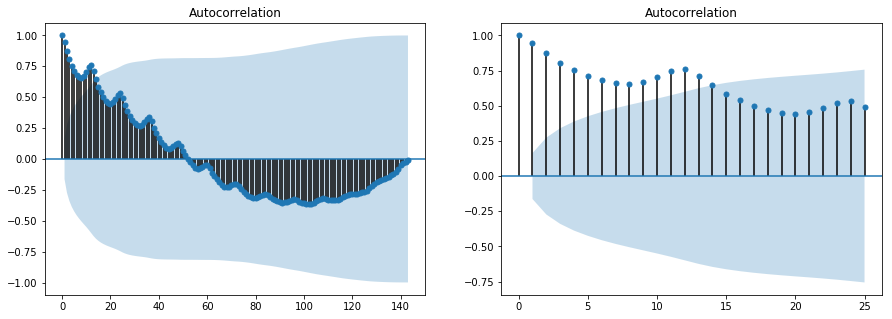

In [61]:
f, axs = plt.subplots(1,2,figsize=(15,5))

plot_acf(df['#Passengers'],ax=axs[0]); # 95% confidence interval
#plot_acf(df['#Passengers'],unbiased=True);  # Denominator changes 
plot_acf(df['#Passengers'],lags=25, ax=axs[1]); # Limit the number of lags - See the peaks at 12 months

Interpreting correlogram

-- The x-axis gives the lag (k) and the y-axis gives the autocorrelation $p_k$ at each lag, i.e. the correlogram is a plot of $p_k$ against k. Correlation is unitless, so there are no units for the y-axis.

-- The lag 0 autocorrelation is always 1 and is shown on the plot.

-- The significant autocorrelation at lag 1 month is probably due to the increasing trend over the period of the data. Usually a trend in the data will show in the correlogram as a slow decay in the autocorrelations, due to similar values in the series occurring close together in time. 

-- Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this cone are very likely a correlation and not a statistical noise/randomness.

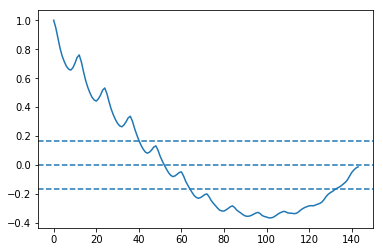

In [62]:
#Another way to plot Autocorrelation
acf_result = acf(df['#Passengers'],nlags=144) #Default nlags=40
plt.plot(acf_result);
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(df['#Passengers'])),linestyle='--')

plt.axhline(y=1.96/np.sqrt(len(df['#Passengers'])),linestyle='--');

In [63]:
#Behind the scene (in brief)
x = np.array(df['#Passengers'])
print(acf(x, unbiased=True))
y1 = x[:144-2]  #Lag2 - Larger the lag, fewer data points
y2 = x[2:]
np.sum((y1-np.mean(x))*(y2-np.mean(x))) / ((len(x) - 2) * np.var(x))

[ 1.          0.95467704  0.88790688  0.82384458  0.774129    0.73944515
  0.71137419  0.69677541  0.69417581  0.71567822  0.75516171  0.80471118
  0.82952186  0.78338294  0.71594837  0.65405405  0.60519959  0.56664286
  0.53569601  0.51825101  0.51285925  0.53528635  0.56948699  0.61542385
  0.6386278   0.5977521   0.53416841  0.47704972  0.43203107  0.3944146
  0.36441703  0.34509264  0.33980156  0.35909103  0.39079178  0.43013344
  0.4493648   0.40822635  0.34502547  0.28889875  0.23839051]


0.88790687505669363

In [64]:
#x,x[:144-2],x[2:]

** Remove Trend ** (to make the time series stationary)

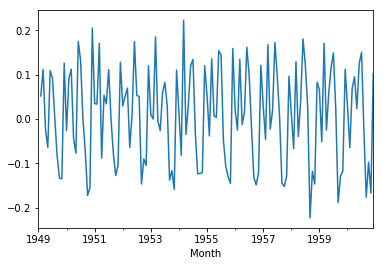

In [65]:
#De trend the data - by taking log and then difference
log_air_passengers = np.log(df['#Passengers'])
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()
log_air_passengers_diff.plot();
log_air_passengers_diff.dropna(inplace = True)

In [66]:
#Test stationarity
# http://www.statsmodels.org/0.6.1/generated/statsmodels.tsa.stattools.adfuller.html
useful_values_raw = adfuller(log_air_passengers_diff, autolag = 'AIC', regression = 'c')[:5]
useful_values = [v for v in useful_values_raw[:4]]
useful_values.extend([useful_values_raw[4]['1%'], useful_values_raw[4]['5%'], useful_values_raw[4]['10%']])
pd.DataFrame({ 'Value':useful_values, 'Label':['Test Statistic','p-value','#Lags Used','Number of Observations Used', 'Critical value for 1%', 'Critical value for 5%', 'Critical value for 10%']})

,Label,Value
0,Test Statistic,-2.717131
1,p-value,0.071121
2,#Lags Used,14.000000
3,Number of Observations Used,128.000000
4,Critical value for 1%,-3.482501
5,Critical value for 5%,-2.884398
6,Critical value for 10%,-2.578960


Is Test Statistic less than critical value ? Is p-value low ? Stationarity is hard to achieve.

- Results aren't perfect - We didn't try to remove seasonality.

- The test statistic is smaller than the 10% critical values so we can say with 90% confidence that this is a stationary series.  Let's try Sunspots dataset !

# Sunspots dataset

In [67]:
#http://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.




The surface of the sun contains magnetic regions that appear as dark spots. These affect the propagation of radio waves and so telecommunication companies like to predict sunspot activity in order to plan for any future difficulties. Sunspots follow a cycle of length between 9 and 14 years.

In [68]:
dta = sm.datasets.sunspots.load_pandas().data
dta.shape

(309, 2)

In [69]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


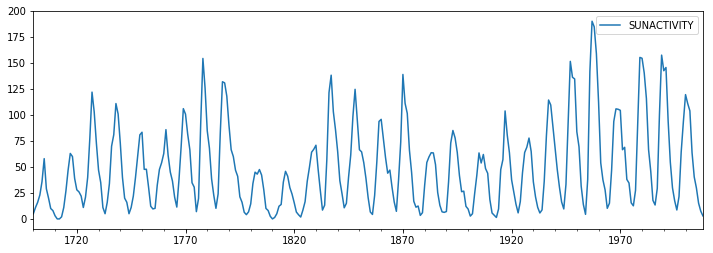

In [70]:
dta.plot(figsize=(12,4));

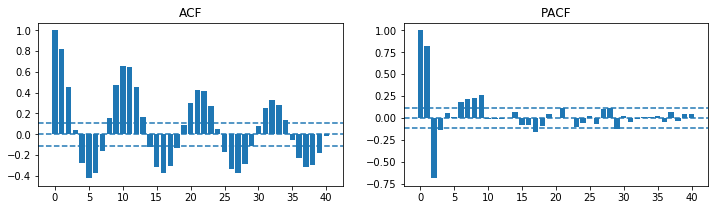

In [71]:
sun_act = dta.SUNACTIVITY
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

lag_acf = acf(sun_act) #dta.SUNACTIVITY  #sun_act  
lag_pacf = pacf(sun_act) #dta.SUNACTIVITY  #sun_act

f, ax = plt.subplots(1, 2,figsize=(12, 3))
ax[0].bar(left = range(len(lag_acf)), height = lag_acf)
ax[0].axhline(y=0,linestyle='--')
ax[0].axhline(y=-1.96/np.sqrt(len(sun_act)),linestyle='--')
ax[0].axhline(y=1.96/np.sqrt(len(sun_act)),linestyle='--')
ax[0].set_title('ACF')
#The lag beyond which the ACF cuts off is the indicated number of MA terms.

ax[1].bar(left = range(len(lag_pacf)), height = lag_pacf)
ax[1].axhline(y=0,linestyle='--')
ax[1].axhline(y=-1.96/np.sqrt(len(sun_act)),linestyle='--')
ax[1].axhline(y=1.96/np.sqrt(len(sun_act)),linestyle='--');
ax[1].set_title('PACF');
#The lag beyond which the PACF cuts off is the indicated number of AR terms.

In [72]:
useful_values_raw = adfuller(dta.SUNACTIVITY)[:5] 
useful_values = [v for v in useful_values_raw[:4]]
useful_values.extend([useful_values_raw[4]['1%'], useful_values_raw[4]['5%'], useful_values_raw[4]['10%']])
pd.DataFrame({ 'Value':useful_values, 'Label':['Test Statistic','p-value','#Lags Used','Number of Observations Used', 'Critical value for 1%', 'Critical value for 5%', 'Critical value for 10%']})

,Label,Value
0,Test Statistic,-2.837781
1,p-value,0.053076
2,#Lags Used,8.000000
3,Number of Observations Used,300.000000
4,Critical value for 1%,-3.452337
5,Critical value for 5%,-2.871223
6,Critical value for 10%,-2.571929


** Forecasting with ARIMA**

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary. 

MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


** Parameters for ARIMA model **

(p, d, q)
1. The number of Auto-Regressive Terms (p) 
2. The number of differences taken (d)
3. The number of Moving Average Terms (q)

E.g:  ARIMA (1,0,0) is AR(1), ARIMA(0,1,0) is I(1), and ARIMA(0,0,1) is MA(1)

- Use PACF for AR model diagnostics (p)
- Use ACF for MA model diagostics (q)

Identifying the number of AR & MA terms - https://people.duke.edu/~rnau/arimrule.htm

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(3, 3)   Log Likelihood               -1279.848
Method:                       css-mle   S.D. of innovations             15.131
Date:                Sat, 09 Sep 2017   AIC                           2575.696
Time:                        23:14:25   BIC                           2605.562
Sample:                    12-31-1700   HQIC                          2587.636
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                48.8657      5.883      8.306      0.000      37.334      60.397
ar.L1.SUNACTIVITY     2.5461      0.034     75.790      0.000       2.480       2.612
ar.L2.SUNACTIVITY    -2.

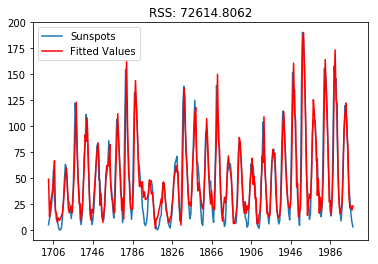

In [73]:
#Creating a model with p,d,q = 2,0,2
model = ARIMA(sun_act, order=(3,0,3))  #2,0,2  #4,0,4 #3,0,3 #2,1,2
results_ARIMA = model.fit(disp=-1)  
#plt.plot(df['consumption'])
plt.plot(sun_act,label='Sunspots')
plt.plot(results_ARIMA.fittedvalues, color='red',label='Fitted Values')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df.consumption)**2));
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-sun_act)**2));
plt.legend()
print(results_ARIMA.summary())

#Note: Lookup auto.arima in R

In [74]:
#http://www.statisticshowto.com/durbin-watson-test-coefficient/
#https://www.otexts.org/fpp/5/4
sm.stats.durbin_watson(results_ARIMA.resid.values)

1.949399939382757

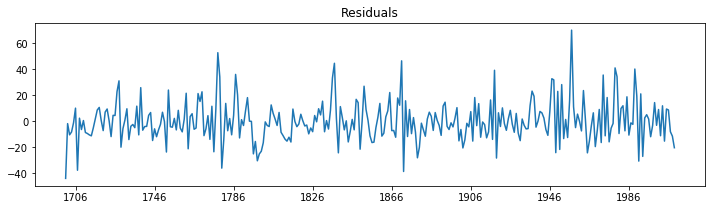

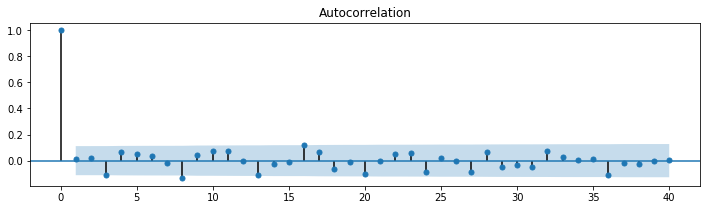

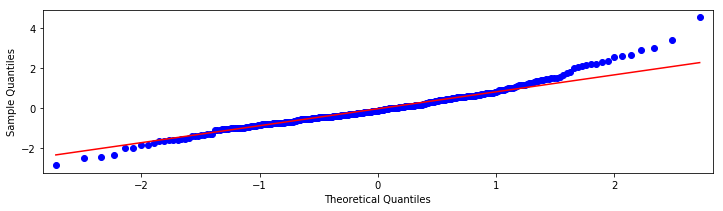

In [75]:
f, ax = plt.subplots(figsize=(12, 3))
ax.plot(results_ARIMA.resid);
ax.set_title('Residuals')

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(results_ARIMA.resid.values.squeeze(), lags=40, ax=ax)

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
fig = qqplot(results_ARIMA.resid, line='q', ax=ax, fit=True)


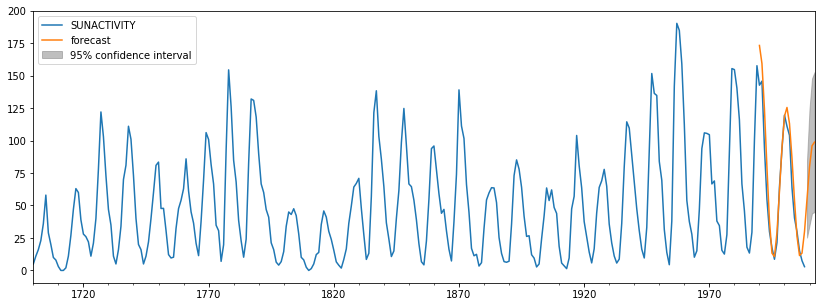

In [76]:
fig, ax = plt.subplots(figsize=(14, 5))
ax = sun_act.plot(ax=ax)
fig = results_ARIMA.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)


In [77]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()
predict_sunspots = results_ARIMA.predict('1990', '2012', dynamic=True)
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

-10.265143627280125

### Ljung-Box statistic

#### Ljung-Box statistic on the ARIMA model residuals

Ljung-Box test is used to check that the residuals from a time series model resemble white noise. 

[From Wikipedia](https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test)

Ljung-Box test statistics hypothesis:  

$H_0 : \text{The residuals have no autocorrelation (i.e. are independently distributed) } $   
$H_A : \text{The residuals are autocorrelated } $
  
  
The test statistic is:

$$ Q = n\left(n+2\right)\sum_{k=1}^h\frac{\hat{\rho}^2_k}{n-k} $$

where n is the sample size, $ \hat{\rho}_k $ is the sample autocorrelation at lag $k$, and $h$ is the number of lags being tested.   

Under $ H_0$ the statistic $Q$ follows a   $\chi _{{(h)}}^{2}$ . For significance level $\alpha$ , the critical region for rejection of the hypothesis of randomness is:

$$ Q > \chi_{1-\alpha,h}^2 $$


In [78]:
r,q,p = sm.tsa.acf(results_ARIMA.resid.values.squeeze(), nlags=15, qstat=True)

data = np.c_[range(1,16), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.009133   0.026026  0.871837
2.0   0.020318   0.155255  0.925309
3.0  -0.108070   3.823071  0.281214
4.0   0.065253   5.164659  0.270816
5.0   0.048999   5.923611  0.313723
6.0   0.038364   6.390409  0.380906
7.0  -0.021616   6.539096  0.478390
8.0  -0.135975  12.442066  0.132543
9.0   0.046142  13.124069  0.157072
10.0  0.072944  14.834169  0.138226
11.0  0.072912  16.548515  0.121958
12.0 -0.001444  16.549190  0.167356
13.0 -0.108485  20.370073  0.086359
14.0 -0.029221  20.648226  0.110993
15.0 -0.012016  20.695419  0.146846


In [79]:
q, p = sm.stats.diagnostic.acorr_ljungbox(results_ARIMA.resid,15)
data = np.c_[range(1,16), q, p]
table = pd.DataFrame(data, columns=['lag', "Q", "Prob(>Q)"])
print(table.set_index('lag'))

              Q  Prob(>Q)
lag                      
1.0    0.026026  0.871837
2.0    0.155255  0.925309
3.0    3.823071  0.281214
4.0    5.164659  0.270816
5.0    5.923611  0.313723
6.0    6.390409  0.380906
7.0    6.539096  0.478390
8.0   12.442066  0.132543
9.0   13.124069  0.157072
10.0  14.834169  0.138226
11.0  16.548515  0.121958
12.0  16.549190  0.167356
13.0  20.370073  0.086359
14.0  20.648226  0.110993
15.0  20.695419  0.146846


### Conclusion
The residuals of the ARMA(3,3) model chosen show no autocorrelation - suggesting that this is an appropriate model fit for the data.

------

### Some examples of ACF and PACF plots for different ARMA processes generated with artificial data


### Source of neat "series over ACF & PACF plot" function `tsplot`
[Tom Augspurger](https://tomaugspurger.github.io/modern-7-timeseries.html)

In [133]:
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_process import arma_generate_sample
seaborn.set(style='ticks', context='talk')

def tsplot(y, lags=None, figsize=(10, 8)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    #[ax.set_xlim(1.5) for ax in [acf_ax, pacf_ax]]
    seaborn.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [134]:
#(arparams[:2]) , maparams[:3]

In [135]:
#http://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.arma_generate_sample.html
arparams = np.r_[1, -np.array([.75, -.25])]  
maparams = np.r_[1, np.array([.65, .25, .10])]

## try to see the differences in the ACF and PACF plots of various processes
y = arma_generate_sample(arparams, maparams, 500)  #ARMA(2,3)
#y = arma_generate_sample(arparams, maparams[:3], 500) #ARMA(2,2)
#y = arma_generate_sample(arparams[:2], maparams[:3], 500) #ARMA(1,2)
#y = arma_generate_sample(arparams[:2], maparams[:2], 500)
#y = arma_generate_sample(arparams[:2], maparams[:1], 500)
#y = arma_generate_sample(arparams[:1], maparams[:2], 500)
#y = arma_generate_sample(arparams[:1], maparams[:3], 500)

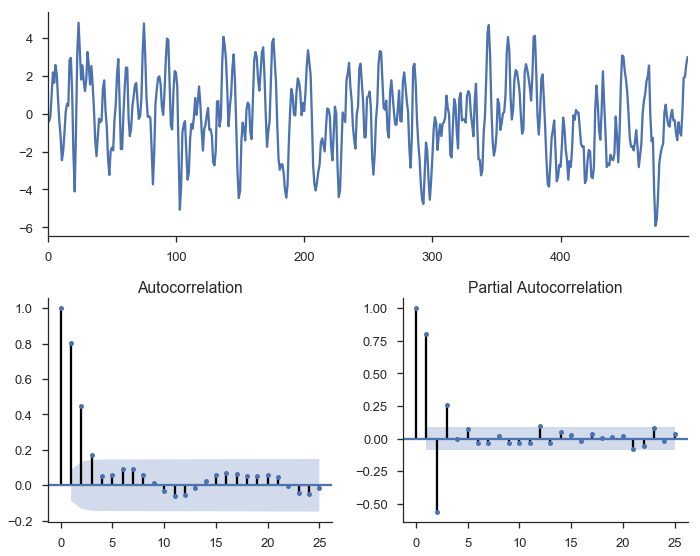

In [136]:
_ = tsplot(pd.Series(y), 25)

-----

In [84]:
#R code to get AirPassengers.csv
#write.table(AirPassengers , file='tmp.csv', row.names = FALSE)
#df = read.csv('tmp.csv')
#df$date = as.Date(AirPassengers)
#write.csv(df,file='AirPassengers.csv', row.names = FALSE)

** References: **

https://github.com/ikding/pycon_time_series/blob/master/01.%20Dates%20%26%20Times.ipynb

https://www.youtube.com/watch?v=zmfe2RaX-14

Trend, Seasonal or cycles - https://www.otexts.org/fpp/6/1

https://people.duke.edu/~rnau/411diff.htm

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
 
Introductory Time Series with R - Paul S.P. Cowpertwait

https://www.youtube.com/watch?v=ckkiG-SDuV8


"An approximate answer to the right problem is worth a good deal more than an exact answer to an approximate problem." -- John Tukey